## SHapley Additive exPlanations (SHAP)

### Library Imports 

In [1]:
import os
import pickle

import pandas as pd
import shap

/home/cyrof/.local/share/virtualenvs/202-assignment-1-AOrvGL2G/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RAND_STATE = 0

### Import the Train and Test Sets

In [3]:
dataset_folder = f"{os.path.abspath(os.path.join(os.getcwd(), os.pardir))}/datasets"

In [4]:
X_train = pd.read_csv(os.path.join(dataset_folder, "obesity_X_train.csv"), index_col=0)

In [5]:
X_test = pd.read_csv(os.path.join(dataset_folder, "obesity_X_test.csv"), index_col=0)

In [18]:
x = pd.read_csv(os.path.join(dataset_folder, "obesityData.csv"))
x = x.drop(columns=["NObeyesdad"])

### Import Random Forest Model

In [6]:
def import_model(filename):
    file_path = f"{os.path.abspath(os.path.join(os.getcwd(), os.pardir))}/models/{filename}"
    with open(file_path, 'rb') as file: 
        model = pickle.load(file)
    print(f"Model imported from {file_path}")
    return model

In [7]:
rand_forest = import_model("rand_forest.pkl")

Model imported from /home/cyrof/university/202-assignment-1/models/rand_forest.pkl


In [8]:
rand_forest_no_weight = import_model("rand_forest_no_weight.pkl")

Model imported from /home/cyrof/university/202-assignment-1/models/rand_forest_no_weight.pkl


### Preprocessing

In [9]:
nominal_features = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS"
]

### Create SHAP explainer 

In [20]:
explainer = shap.Explainer(rand_forest)
explanation = explainer(X_train)

shap_values = explanation.values

In [21]:
shap.plots.beeswarm(explanation)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

### Summary Plot

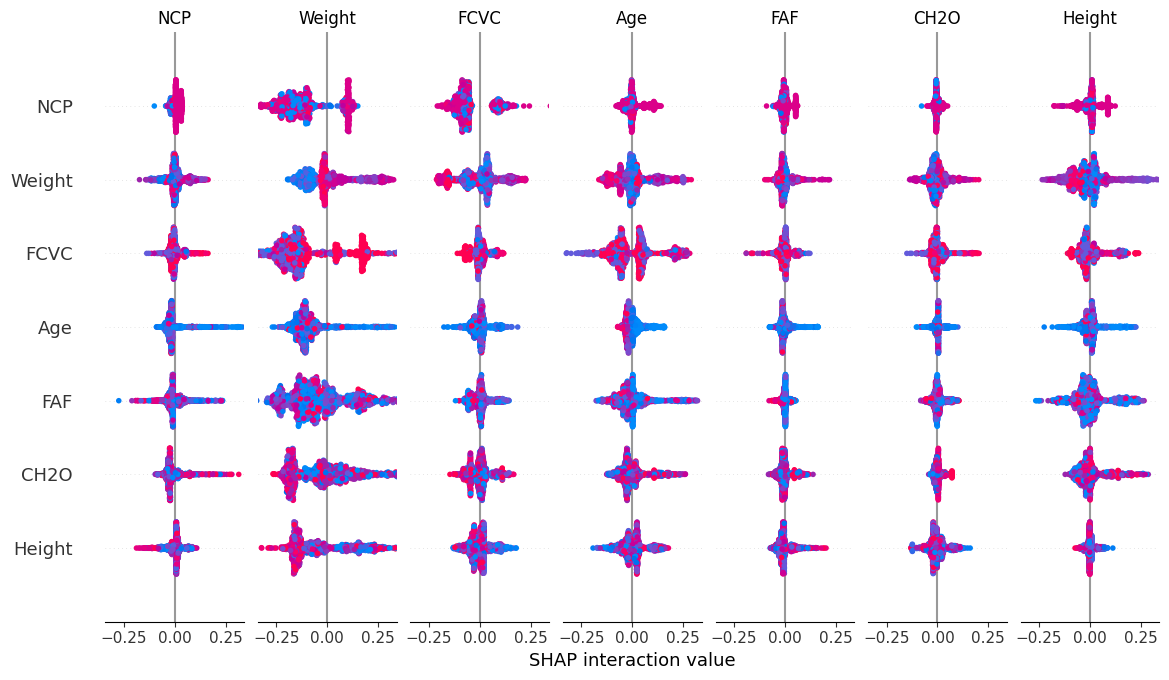

In [30]:
shap.summary_plot(shap_values, X_train.values, plot_type="bar", feature_names=X_train.columns)

In [35]:
shap.summary_plot(shap_values[1], X_train.values, feature_names=X_train.columns)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
shap_values[0]

array([[-2.31883599e-02, -3.03570132e-03, -3.53501255e-02,
         2.59623215e-02,  1.27662229e-02, -5.04560260e-02,
         7.33016684e-02],
       [ 3.21774900e-04, -1.17551096e-02, -5.33369702e-02,
        -1.49422716e-02,  5.90200834e-03, -2.79479010e-02,
         1.01758469e-01],
       [-4.95392556e-02, -1.59340888e-02,  2.20179224e-02,
        -1.13130564e-01, -1.12996080e-01,  4.81398210e-02,
         2.21442245e-01],
       [ 7.06309141e-03, -2.34111686e-02,  7.91551255e-03,
         2.33029795e-02, -5.83330601e-02,  1.11822875e-02,
         3.22803576e-02],
       [-9.06392066e-03,  9.95666928e-03, -4.57848816e-03,
        -2.29111277e-03,  7.67897248e-03, -1.35091555e-02,
         1.18070353e-02],
       [ 2.24304582e-03, -1.07618923e-02, -6.33454205e-03,
        -5.22444016e-03,  7.09673589e-04,  1.21369204e-02,
         7.23123465e-03],
       [-4.50397880e-03, -9.34838280e-03, -6.45255271e-03,
         1.80731219e-03, -1.51106812e-03, -4.87328266e-03,
         2.4881952

In [36]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1995,-0.626196,0.841363,1.975893,1.096143,0.411816,1.130284,0.703599,0.135752,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1146,1.054370,1.114070,0.180712,-0.798168,0.411816,-1.330426,-1.129468,-0.798823,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1363,1.065258,-0.374566,0.130251,-0.278816,-2.071397,-1.070723,0.558097,-1.067615,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
727,-0.706875,0.650139,-1.189947,-0.570500,1.684954,0.932835,1.166922,1.418415,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
573,-0.991339,-0.003824,-1.396256,-2.537904,1.074554,-1.629241,-0.419384,0.578099,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,-0.840667,0.863357,-0.858464,-0.798168,0.411816,-1.657016,-0.009349,-1.067615,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
934,-0.751562,1.456455,0.118366,-0.149702,1.186966,1.418506,1.166922,-0.724775,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2003,0.240920,-0.727975,0.980929,1.096143,0.411816,0.993976,-1.185621,-0.836610,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
576,-0.762685,-1.192762,-1.689444,1.019723,0.411816,-1.657016,0.605134,-1.067615,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
print("Shape of shap_values[1]:", shap_values[1].shape)

Shape of shap_values[1]: (23, 7)


In [38]:
print("Shape of X_train.values:", X_train.values.shape)

Shape of X_train.values: (1477, 23)
